Text(0.5, 1.0, 'complaints at daily granularity levels')

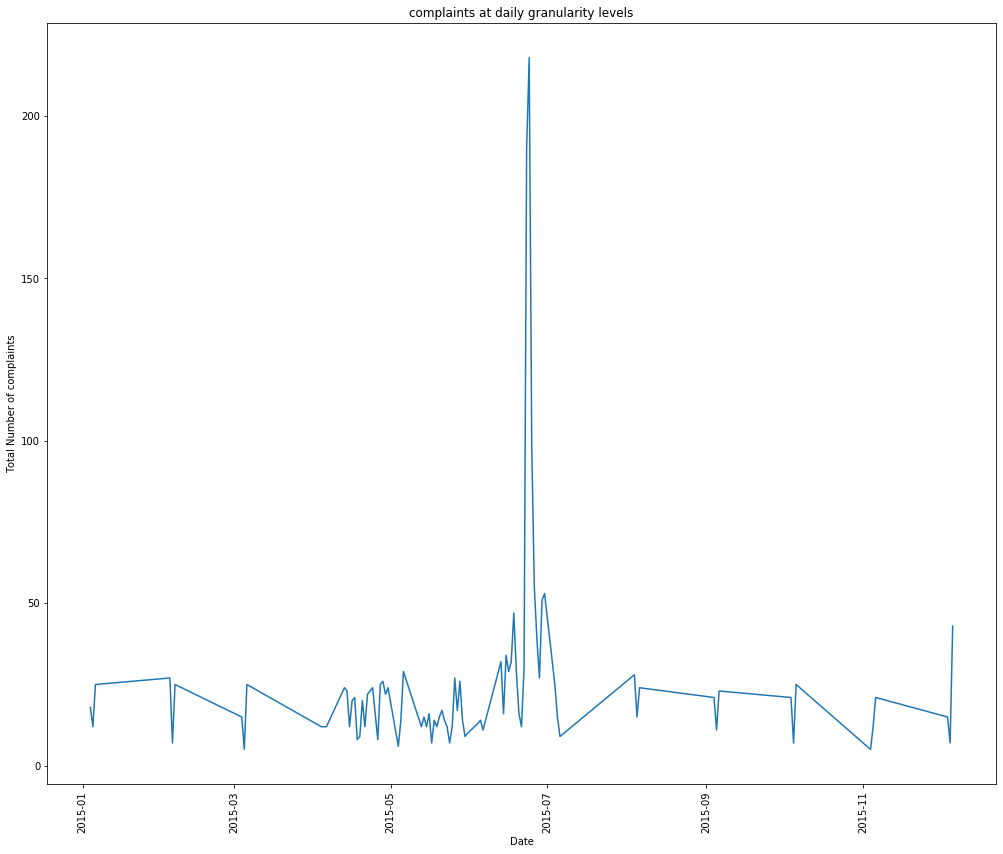

In [1]:
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline
df_telecom = pd.read_csv('Comcast_telecom_complaints_data.csv')
df_telecom['Date'] = pd.to_datetime(df_telecom.Date,format="%d-%m-%y")
df_telecom['Month'] = df_telecom['Date'].dt.month
df_daily = pd.DataFrame(df_telecom.groupby('Date').agg({'Date' : 'count'}))
plt.figure(figsize=(17,14))
plt.plot(df_daily.index, df_daily)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Number of complaints")
plt.title("complaints at daily granularity levels")

Text(0.5, 1.0, 'complaints at Monthly granularity levels')

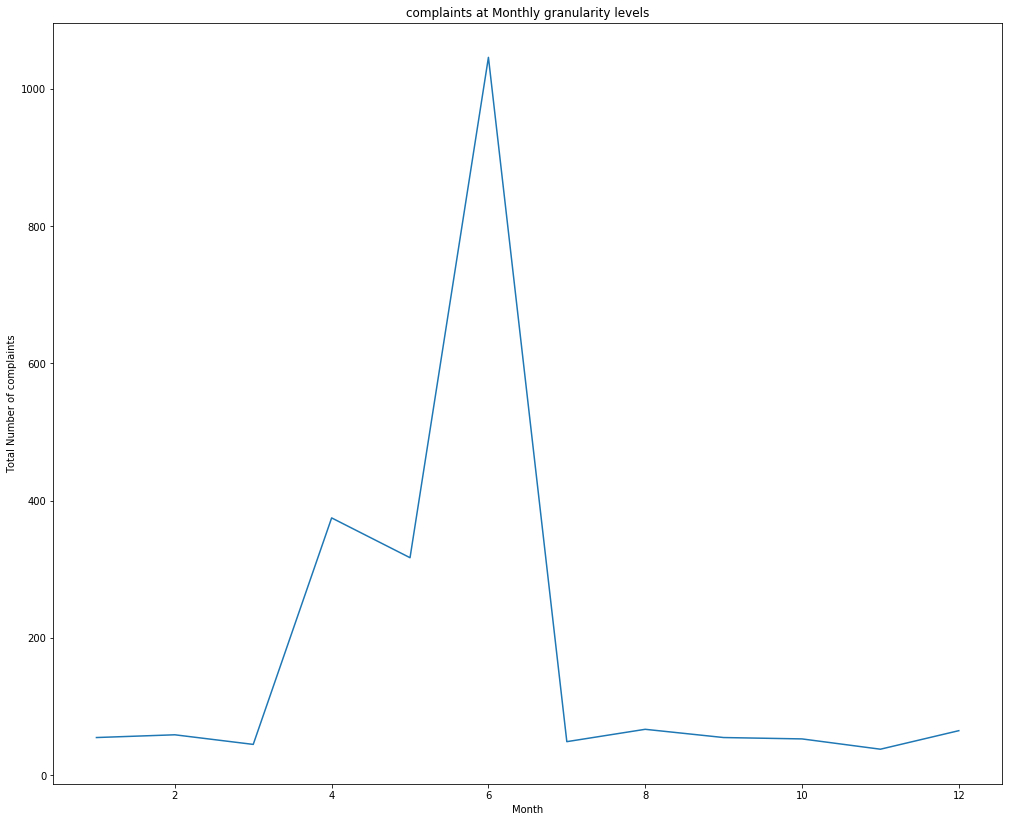

In [2]:
df_Monthly = pd.DataFrame(df_telecom.groupby('Month').agg({'Month' : 'count'}))
plt.figure(figsize=(17,14))
plt.plot(df_Monthly.index, df_Monthly)
plt.xlabel("Month")
plt.ylabel("Total Number of complaints")
plt.title("complaints at Monthly granularity levels")

In [20]:
df_complaint_types = pd.DataFrame(df_telecom.groupby('Customer Complaint').agg({'Customer Complaint' : 'count'}))
df_complaint_types.rename(columns={'Customer Complaint': 'Count of Customer Complaint'})
df_complaint_ = pd.DataFrame({'Count of Customer Complaint': df_complaint_types.iloc[:,0]})
df_complaint_.sort_values(by=['Count of Customer Complaint'], inplace=True, ascending=False)
df_complaint_

,Count of Customer Complaint
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
...,...
Comcast internet speeds extremely slow,1
Comcast internet speeds,1
Comcast internet service that I was NEVER able to use,1


In [5]:
df_telecom['New_Status'] = df_telecom.loc[:,'Status']
df_telecom['New_Status'].replace('Solved','Closed', inplace=True)
df_telecom['New_Status'].replace('Pending','Open', inplace=True)
df_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed


In [7]:
df_telecom.New_Status.unique()

array(['Closed', 'Open'], dtype=object)

In [8]:
State_Data = pd.DataFrame(pd.crosstab(df_telecom.State,df_telecom.New_Status))

Text(0.5, 1.0, 'state wise status of complaints in a stacked bar chart')

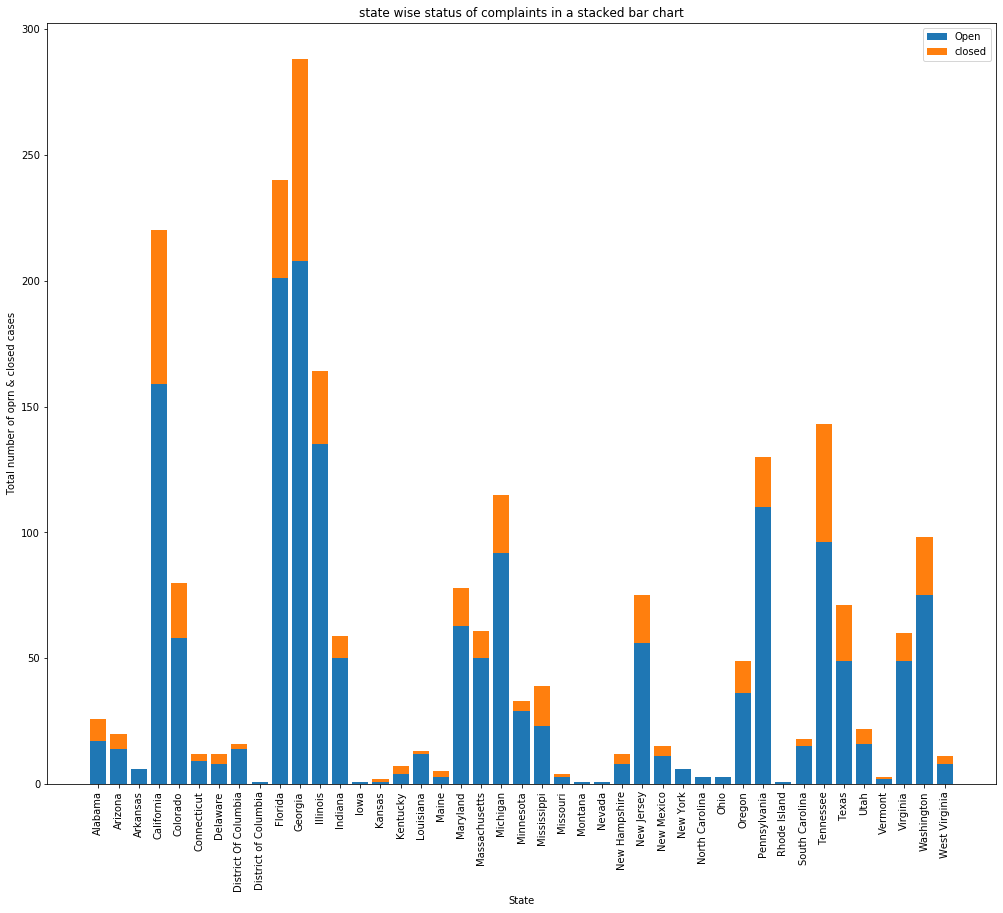

In [9]:
plt.figure(figsize=(17,14))
plt.xticks(rotation=90)
plt.bar(State_Data.index,State_Data.Closed,tick_label=State_Data.index)
plt.bar(State_Data.index,State_Data.Open,bottom=State_Data.Closed)
plt.legend(['Open', 'closed'])
plt.xlabel("State")
plt.ylabel("Total number of oprn & closed cases")
plt.title("state wise status of complaints in a stacked bar chart")

In [10]:
State_Data = pd.DataFrame(pd.crosstab(df_telecom.State,df_telecom.New_Status, margins=True, margins_name="Total"))

In [11]:
State_Data['unresolved_complaints'] = pd.DataFrame((State_Data.Open / State_Data.Total)*100)

In [12]:
State_Data = State_Data.drop('Total',axis=0)

In [13]:
Max_Comp = State_Data.Total.idxmax()
print("state with the maximum complaints - ",Max_Comp)
Max_Comp_unsolved = State_Data.unresolved_complaints.idxmax()
print("state with highest percentage of unresolved complaints is -",Max_Comp_unsolved)

state with the maximum complaints -  Georgia
state with highest percentage of unresolved complaints is - Kansas


In [14]:
State_Data.head()

New_Status,Closed,Open,Total,unresolved_complaints
State,,,,
Alabama,17,9,26,34.615385
Arizona,14,6,20,30.000000
Arkansas,6,0,6,0.000000
California,159,61,220,27.727273
Colorado,58,22,80,27.500000


In [16]:
df_telecom
df_telecom = df_telecom.rename(columns={'Received Via': 'Received_Via'})

In [17]:
New_Received_Via = pd.DataFrame(pd.crosstab(df_telecom.Received_Via,df_telecom.New_Status,  margins=True, margins_name="Total"))

In [18]:
New_Received_Via['% complaints resolved till date'] = pd.DataFrame((New_Received_Via.Closed / New_Received_Via.Total)*100)
New_Received_Via

New_Status,Closed,Open,Total,% complaints resolved till date
Received_Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593
Total,1707,517,2224,76.753597
